In [1]:
import os
import numpy as np
from scipy import stats
import pandas as pd
import joblib
from matplotlib import pyplot as plt

In [2]:
target = 'mnist'
#target = 'cifar10'
#start_epoch = 0
start_epoch = 0
end_epoch = 20
seed = 0

# res = joblib.load('./mnist/mnist_00/infl_sgd_at_epoch20.dat' )

In [8]:
res.shape

(50000, 20)

In [3]:
target = 'mnist'
#target = 'cifar10'
#start_epoch = 0
start_epoch = 0
end_epoch = 20
seed = 0

res = joblib.load('./%s/%s_%02d/eval_epoch_%02d_to_%02d.dat' % (target, target, seed, start_epoch, end_epoch))
res2 = joblib.load('./%s/%s_%02d/eval_epoch_%02d_to_%02d_outlier.dat' % (target, target, seed, start_epoch, end_epoch))
res.pop('baseline')
res2.pop('baseline')
methods = np.sort(np.unique([key[0] for key in res.keys()]))
methods2 = np.sort(np.unique([key[0] for key in res2.keys()]))
ks = np.sort(np.unique([key[1] for key in res.keys()]))
print(methods, methods2, ks)

['icml' 'random' 'sgd_all' 'sgd_last'] ['ae' 'iso'] [    1     3     6    10    30    60   100   300   600  1000  3000  6000
 10000]


In [14]:
res

{('icml', 1): (0.04794962887763977,
  0.05849672906398773,
  0.05728483936786652,
  0.98566,
  0.9827,
  0.9819),
 ('sgd_last', 1): (0.04318722285270691,
  0.05748988063335419,
  0.054721101689338685,
  0.98714,
  0.9843,
  0.983),
 ('sgd_all', 1): (0.04610683877706528,
  0.05262811486721039,
  0.058561850214004514,
  0.98642,
  0.9838,
  0.9813),
 ('random', 1): (0.047033261499404906,
  0.057369753336906436,
  0.056848825287818906,
  0.98566,
  0.9828,
  0.9828),
 ('icml', 3): (0.05224924339771271,
  0.0626467294216156,
  0.05740595030784607,
  0.98412,
  0.9813,
  0.9817),
 ('sgd_last', 3): (0.0497647931265831,
  0.05916442325115204,
  0.05779434342384338,
  0.98462,
  0.9815,
  0.9822),
 ('sgd_all', 3): (0.04316646119117737,
  0.05267748529911041,
  0.054182406902313233,
  0.98694,
  0.9836,
  0.9827),
 ('random', 3): (0.043419454131126405,
  0.05404853951931,
  0.053931722581386565,
  0.98686,
  0.984,
  0.9836),
 ('icml', 6): (0.044230684146881104,
  0.05322565298080444,
  0.05454

In [4]:
n = 30

acc = np.zeros((ks.size, methods.size+methods2.size+1, n))
t = 5
for seed in range(1):
    try:
        res = joblib.load('./%s/%s_%02d/eval_epoch_%02d_to_%02d.dat' % (target, target, seed, start_epoch, end_epoch))
        res2 = joblib.load('./%s/%s_%02d/eval_epoch_%02d_to_%02d_outlier.dat' % (target, target, seed, start_epoch, end_epoch))
        acc[:, 0, seed] = res.pop('baseline')[t]
        for i, m in enumerate(methods):
            for j, k in enumerate(ks):
                acc[j, i+1, seed] = res[(m, k)][t]
        for i, m in enumerate(methods2):
            for j, k in enumerate(ks):
                acc[j, methods.size+i+1, seed] = res2[(m, k)][t]
    except:
        continue

idx = np.where(np.min(acc, axis=(0,1)))[0]
acc = acc[:, :, idx]
print(acc.shape)

(13, 7, 1)


In [10]:
temp = 1-np.mean(acc, axis=2)
temp.min(),temp.max()

(0.015599999999999947, 0.11360000000000003)

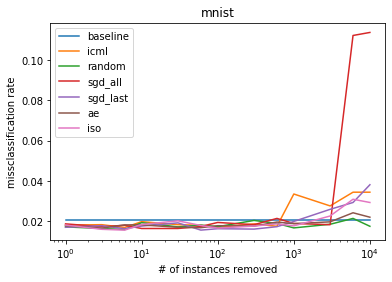

In [12]:
plt.semilogx(ks, 1-np.mean(acc, axis=2))
plt.legend(['baseline', *methods.tolist(), *methods2.tolist()])
plt.xlabel('# of instances removed')
plt.ylabel('missclassification rate')
if target == 'mnist':
#     plt.ylim([0.01, 0.11])
    pass
elif target == 'cifar10':
    plt.ylim([0.155, 0.175])
plt.title('%s' % (target,))
plt.show()